# Gathering Data

In [2]:
# Load the data
%cd /content/drive/MyDrive/Business Analyst Workbooks/Intermediate Statistics/

/content/drive/MyDrive/Business Analyst Workbooks/Intermediate Statistics


In [3]:
# Import the libraries
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [4]:
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Confidence Interval

- When the sample size is greater than 30, confidence interval is the concept used to determine how much a paramter can vary.

- The two extreme ranges are re-defined.

In [6]:
# Determing the mean of citric acid
print("The mean of citric acid is", df[['citric acid']].mean())

The mean of citric acid is citric acid    0.270976
dtype: float64


In [8]:
# Determing the confidence interval of the mean of citric acid
st.norm.interval(confidence = 0.95,
                 loc = df[['citric acid']].mean(),
                 scale = st.sem(df[['citric acid']]))

(array([0.26142755]), array([0.28052367]))

- Be careful and follow the syntax, the lecturer used alpha as the first parameter but it worked for him but we needed to use confidence.

- As the term 'citric acid' is separated by space so we can't do 'df. citric acid' instead we must use **df[['citric acid']]**.

array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

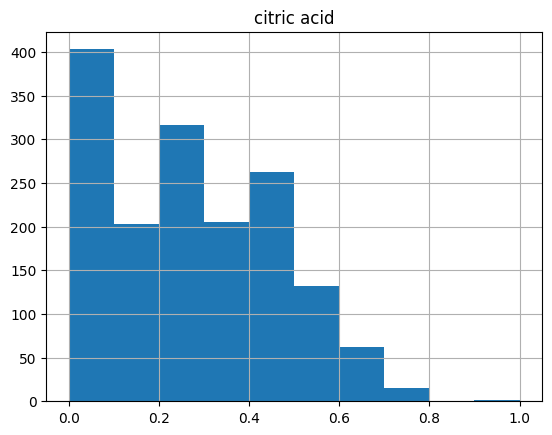

In [9]:
# Plotting the histogram
df[['citric acid']].hist()

In [13]:
# Question - Confidence Interval of the density mean
print("The mean of density is", df.density.mean())
st.norm.interval(confidence=0.95,
                 loc = df.density.mean(),
                 scale = st.sem(df.density))

The mean of density is 0.9967466791744841


(0.9966541725972521, 0.9968391857517162)

<Axes: >

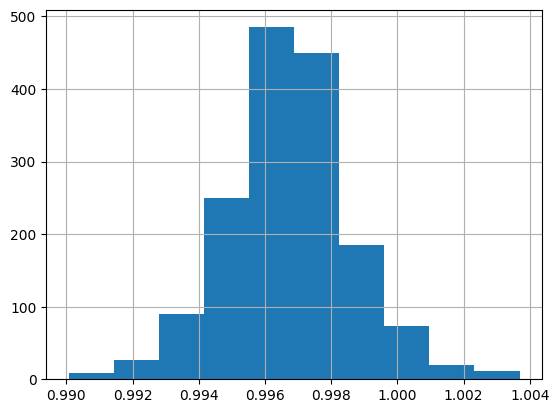

In [12]:
# Histogram of Density mean
df.density.hist()

# T-Tests

- These are done to test any statistical hypothesis in which the test statistic follows a student's t-distribution under null hypothesis.

- In simple terms it helps us determine whether one group is statistically different from the other.

- If p-value is less than 0.05, then the groups are statistically different.

- We will be using a new dataset to perform t-test so we need to load it before doing further analysis.

In [15]:
# Load Data
data = pd.read_csv("stackoverflow.csv")
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


- We will be analyzing the salaries of UK and Germany based employees.

- We need to subset the data from that huge dataset before doing anything

In [19]:
# Subsetting UK employees using .loc() function
salary_uk = data.loc[data.Country == 'United Kingdom'].Salary
salary_uk.head()

0     100000.0
11     32500.0
12     30000.0
17     32500.0
18     43750.0
Name: Salary, dtype: float64

In [20]:
# Subsetting Germany employees using .loc() function
salary_germany = data.loc[data.Country == 'Germany'].Salary
salary_germany.head()

3     64516.12903
7     53763.44086
9     83870.96774
25    10752.68817
43    59139.78495
Name: Salary, dtype: float64

In [21]:
stat, p = st.ttest_ind(a = salary_uk, b = salary_germany)
print(p)
if p > 0.05:
  print("Both countries have similar salaries (failed to reject null hypothesis)")
else:
  print("The salaries are different (Rejected the null hypothesis)")

0.026389999555203502
The salaries are different (Rejected the null hypothesis)


In [24]:
# T-test in experience between India and United States
exp_ind = data.loc[data.Country == "India"].YearsCodedJob
exp_us = data.loc[data.Country == "United States"].YearsCodedJob

In [25]:
exp_ind.head()

4     1
24    1
60    2
64    2
78    5
Name: YearsCodedJob, dtype: int64

In [26]:
exp_us.head()

1    20
2    16
5     1
6    13
8     7
Name: YearsCodedJob, dtype: int64

In [28]:
s, pt = st.ttest_ind(a = exp_ind, b = exp_us)
print(pt)
if pt > 0.05:
  print("The experiences are interrelated, failed to reject null hypothesis")
else:
  print("The experiences are independent, rejected the null hypothesis")

5.225676347614714e-58
The experiences are independent, rejected the null hypothesis


<Axes: >

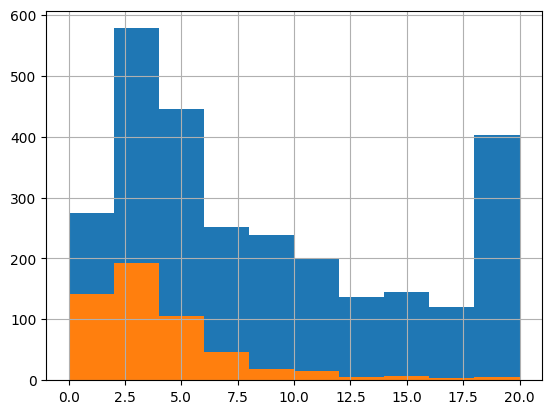

In [29]:
# Visualizing through histograms
exp_us.hist()
exp_ind.hist()

# Chi-Square Tests

- This test determines whether there is a statistically significant difference between the expected frequencies and the observed frequencies.

- This test is done for non-continuous variables and T-test for continuous variables.

In [31]:
# Cross Tabulation
tab = pd.crosstab(index = data.Country,
                  columns = data.Remote)

tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [32]:
# Chi Square Test
st.chi2_contingency(tab)

Chi2ContingencyResult(statistic=78.67672415412689, pvalue=3.321120877301216e-16, dof=4, expected_freq=array([[ 435.14747944,   49.85252056],
       [ 679.18895245,   77.81104755],
       [ 482.69967823,   55.30032177],
       [ 917.84715767,  105.15284233],
       [2504.11673221,  286.88326779]]))

- There are too many parameters that are returning in through this function.

In [34]:
res, statistic, pvalue, dof = st.chi2_contingency(tab)
print(statistic)
if statistic > 0.05:
  print("There is a relation, failed to reject null hypothesis")
else:
  print("They are independent, rejected the null hypothesis")

3.321120877301216e-16
They are independent, rejected the null hypothesis


In [36]:
# Chi Square Test between company size and hobbies
taab = pd.crosstab(index = data.CompanySizeNumber,
                    columns = data.Hobby)
taab

Hobby,0,1
CompanySizeNumber,,
1,101,311
10,123,400
20,293,961
100,245,918
500,91,309
1000,180,436
5000,60,192
10000,243,731


In [37]:
res, statistic, pvalue, dof = st.chi2_contingency(taab)
print(statistic)
if statistic > 0.05:
  print("There is a relation, failed to reject null hypothesis")
else:
  print("They are independent, rejected the null hypothesis")

0.025708455559671047
They are independent, rejected the null hypothesis


# Power Posing and P-Hacking